Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing Light
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing Camera
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing Camera.001
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing light
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing Camera.002
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing light.001
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing Camera.003
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing light.002
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing Camera.004
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing light.003
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing Camera.005
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing light.004
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing Camera.006
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing light.005
Fra:1 Mem:39.58M (Peak 39.58M) | Time:00:00.00 | Syncing Camera.007

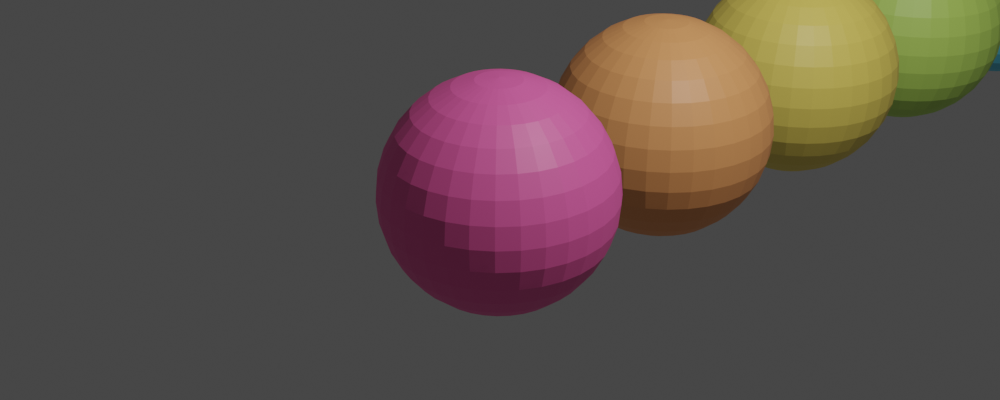

In [19]:
import bpy
from IPython.display import display, Image

# Clear all existing mesh objects
bpy.ops.object.select_all(action="DESELECT")
bpy.ops.object.select_by_type(type="MESH")
bpy.ops.object.delete()

# Rainbow colors (R, G, B, A)
rainbow_colors = [
    (0.941, 0.129, 0.427, 1),
    (0.933, 0.376, 0.133, 1),
    (0.929, 0.725, 0.133, 1),
    (0.525, 0.808, 0.141, 1),
    (0.133, 0.702, 0.933, 1),
    (0.141, 0.349, 0.808, 1),
    (0.639, 0.141, 0.808, 1),
]

# Distance between spheres (Reduced to bring them closer)
distance_increment = 2

# Create the 10 spheres
for i in range(10):
    bpy.ops.mesh.primitive_uv_sphere_add(
        radius=1,
        enter_editmode=False,
        align="WORLD",
        location=(0, i * distance_increment, 0),
    )
    sphere = bpy.context.active_object

    # Create a material with the color based on the counter
    material = bpy.data.materials.new(name=f"Rainbow Material {i}")
    material.use_nodes = True
    nodes = material.node_tree.nodes
    nodes["Principled BSDF"].inputs["Base Color"].default_value = rainbow_colors[i % 7]

    # Assign the material to the sphere
    sphere.data.materials.append(material)

# Setup the camera
camera = bpy.data.cameras.new("Camera")
camera.lens = 85
camera.dof.use_dof = True

# Adjust the camera's position
camera_obj = bpy.data.objects.new("Camera", camera)
bpy.context.collection.objects.link(camera_obj)
camera_obj.location = (5, 9 * distance_increment / 2, 0)  # Shifted camera to the right by increasing x-coordinate
camera_obj.rotation_euler = (1.0, 0, 0)

# Adjust the focus distance
camera.dof.focus_distance = 300  # Focus on the center

# Adjust the aperture for depth of field
camera.dof.aperture_fstop = 2.0  # Increase aperture to reduce blur

# Setup lighting
light_data = bpy.data.lights.new(name="light", type="POINT")
light_object = bpy.data.objects.new(name="light", object_data=light_data)
bpy.context.collection.objects.link(light_object)
light_object.location = (9, 9 * distance_increment / 2, 0)  # Shifted light to match the camera's new position

# Render settings
bpy.context.scene.render.resolution_x = 1000
bpy.context.scene.render.resolution_y = 400
bpy.context.scene.render.image_settings.file_format = "PNG"
bpy.context.scene.render.filepath = "test_sphere.png"

# Render the image
bpy.ops.render.render(write_still=True)

# Save the image to the specified filepath
bpy.data.images["Render Result"].save_render(filepath=bpy.context.scene.render.filepath)

display(Image("test_sphere.png"))
